# Data preparation


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
'''
fig_params={'legend.fontsize':28,
          'axes.labelsize': 28,
          'axes.titlesize':32,
          'xtick.labelsize':24,
          'ytick.labelsize':24,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)
'''

%matplotlib inline

In [2]:
df=pd.read_csv('./data/FuelConsumption_final.csv')

In [3]:
X=df[['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY',
       'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB', 'E',
       'N', 'X', 'Z', 'E.1', 'N.1', 'X.1', 'Z.1', 'FULL-SIZE', 'MID-SIZE',
       'MINICOMPACT', 'MINIVAN', 'PICKUP TRUCK - SMALL',
       'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'STATION WAGON - SMALL', 'SUBCOMPACT',
       'SUV', 'SUV - SMALL', 'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO',
       'VAN - PASSENGER', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6',
       'AM7', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AV', 'AV6', 'AV7',
       'AV8', 'M4', 'M5', 'M6', 'M7']]
y=df['CO2_EMISSIONS']

In [4]:
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
X_train,X_cv,y_train,y_cv=train_test_split(X_temp,y_temp,test_size=0.2)

## Normalization

In [5]:
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [6]:
def normalize(df,normalizer):
    df[['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY',
       'FUEL_CONSUMPTION_HWY', 'FUEL_CONSUMPTION_COMB', 'E',
       'N', 'X', 'Z', 'E.1', 'N.1', 'X.1', 'Z.1', 'FULL-SIZE', 'MID-SIZE',
       'MINICOMPACT', 'MINIVAN', 'PICKUP TRUCK - SMALL',
       'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'STATION WAGON - SMALL', 'SUBCOMPACT',
       'SUV', 'SUV - SMALL', 'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO',
       'VAN - PASSENGER', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6',
       'AM7', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AV', 'AV6', 'AV7',
       'AV8', 'M4', 'M5', 'M6', 'M7']]=normalizer.transform(df)
    return df
    

In [7]:
X_train=normalize(X_train,scaler)
X_cv=normalize(X_cv,scaler)
X_test=normalize(X_test,scaler)

<ipython-input-6-eb6d83f3988f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['MODEL_YEAR', 'ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY',
/home/chaitanya/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-6-eb6d83f3988f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [8]:
X_train

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,E,N,X,Z,...,AS8,AS9,AV,AV6,AV7,AV8,M4,M5,M6,M7
152,0.000000,0.394737,0.285714,0.450820,0.398734,0.436548,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.000000,0.263158,0.285714,0.389344,0.329114,0.370558,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902,0.071429,0.500000,0.428571,0.495902,0.537975,0.517766,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117,0.071429,0.289474,0.285714,0.352459,0.310127,0.340102,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8523,0.642857,0.223684,0.285714,0.323770,0.272152,0.309645,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8166,0.642857,0.447368,0.285714,0.479508,0.436709,0.472081,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466,0.214286,0.157895,0.142857,0.250000,0.208861,0.233503,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10878,0.785714,0.131579,0.142857,0.180328,0.196203,0.182741,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10135,0.785714,0.368421,0.285714,0.377049,0.329114,0.365482,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model building

In [9]:
# def bestModel(model, X_train, X_cv, y_train, y_cv, grid):
#     model_cv = GridSearchCV(model, grid, cv=4)
#     model_cv.fit(X_train, y_train)
#     print("tuned hpyerparameters :(best parameters) ", model_cv.best_params_)
#     print("accuracy :", model_cv.best_score_)
#     mod_best= model_cv.best_estimator_
#     return mod_best


# def testModel(model, X_train, X_cv, y_train, y_cv):
#     model.fit(X_train,y_train)
#     y_pred_tr = model.predict(X_train)
#     y_pred_cv = model.predict(X_cv)
#     precision_tr, recall_tr, fscore_tr, support_tr = precision_recall_fscore_support(
#         y_train, y_pred_tr, average='macro')
#     precision_cv, recall_cv, fscore_cv, support_cv = precision_recall_fscore_support(
#         y_cv, y_pred_cv, average='macro')
#     report= np.array([precision_tr, recall_tr, fscore_tr, precision_cv, recall_cv, fscore_cv])
#     return report



## Linear Regression

In [11]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)

y_train_pred=linReg.predict(X_train)
y_cv_pred=linReg.predict(X_cv)

In [12]:
print('mean sq error training data : ',mean_squared_error(y_train,y_train_pred))
print('mean sq error cross-val data : ',mean_squared_error(y_cv,y_cv_pred))
print()
print('mean abs error training data : ',mean_absolute_error(y_train,y_train_pred))
print('mean abs error cross-val data : ',mean_absolute_error(y_cv,y_cv_pred))

mean sq error training data :  21.109718792514368
mean sq error cross-val data :  23.486876895985045

mean abs error training data :  2.0575736579528314
mean abs error cross-val data :  2.1772289827101785


<AxesSubplot:xlabel='CO2_EMISSIONS', ylabel='Count'>

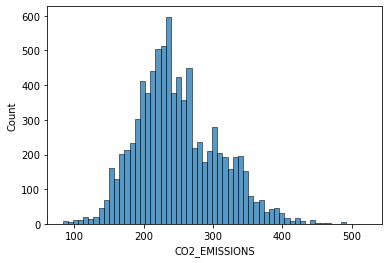

In [14]:
sns.histplot(data=y_train)

Text(0, 0.5, 'Predicted')

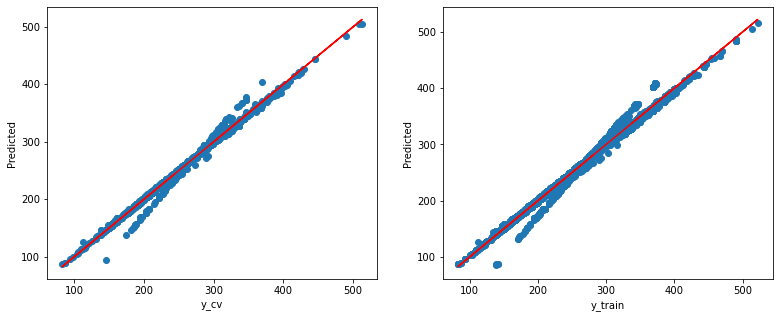

In [18]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
ax[0].scatter(y_cv,y_cv_pred)
ax[0].plot(y_cv,y_cv,'r')
ax[0].set_xlabel('y_cv')
ax[0].set_ylabel('Predicted')
ax[1].scatter(y_train,y_train_pred)
ax[1].plot(y_train,y_train,'r')
ax[1].set_xlabel('y_train');ax[1].set_ylabel('Predicted')

## ANN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
print(X_train.shape,y_train.shape)

(8551, 53) (8551,)
